# Milestone 2: Machine Learning

### PCA Experimenation

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# read merged and cleaned df
df = pd.read_csv("Motor_Vehicle_Collisions_-_Full.csv")
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,PERSON_SEX
0,09/11/2021,2:39,Unspecified,Unspecified,0.000000,0.000000,Unspecified,WHITESTONE EXPRESSWAY,20 AVENUE,Unspecified,...,Not Ejected,Conscious,Back,Driver,Lap Belt,Unspecified,Unspecified,Complaint of Pain or Nausea,Driver,M
1,03/26/2022,11:45,Unspecified,Unspecified,0.000000,0.000000,Unspecified,QUEENSBORO BRIDGE UPPER,Unspecified,Unspecified,...,Not Ejected,Conscious,Shoulder - Upper Arm,Driver,Lap Belt & Harness,Unspecified,Unspecified,Complaint of Pain or Nausea,Driver,F
2,06/29/2022,6:55,Unspecified,Unspecified,0.000000,0.000000,Unspecified,THROGS NECK BRIDGE,Unspecified,Unspecified,...,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt & Harness,Unspecified,Unspecified,Does Not Apply,Driver,M
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",Unspecified,Unspecified,1211 LORING AVENUE,...,Not Ejected,Does Not Apply,Does Not Apply,Unspecified,Unspecified,Unspecified,Unspecified,Does Not Apply,Driver,F
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,Unspecified,...,Unspecified,Does Not Apply,Does Not Apply,Unspecified,Unspecified,Pedestrian/Bicyclist/Other Pedestrian at Inter...,"Crossing, No Signal, Marked Crosswalk",Does Not Apply,Pedestrian,M


In [3]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'PERSON_ID', 'PERSON_TYPE',
       'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY',
       'POSITION_IN_VE

In [4]:
# identify target
df.value_counts('PERSON_INJURY')

PERSON_INJURY
Unspecified    1212296
Injured         271605
Killed            1365
Name: count, dtype: int64

In [5]:
# change target to numeric
df['PERSON_INJURY'] = df['PERSON_INJURY'].replace({'Unspecified': 0, 'Injured': 0, 'Killed': 1})
df.value_counts('PERSON_INJURY')

C:\Users\mrats\AppData\Local\Temp\ipykernel_3316\640272817.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PERSON_INJURY'] = df['PERSON_INJURY'].replace({'Unspecified': 0, 'Injured': 0, 'Killed': 1})


PERSON_INJURY
0    1483901
1       1365
Name: count, dtype: int64

In [6]:
# drop columns that don't contain text for vectorizer as well as unecessary features
df_t = df.drop(['LATITUDE', 'LONGITUDE', 'COLLISION_ID', 'VEHICLE_YEAR', 'CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'LOCATION', 'PERSON_ID', 'DRIVER_LICENSE_JURISDICTION','PED_LOCATION', 'PED_ACTION',
       'COMPLAINT', 'PED_ROLE', 'PERSON_SEX', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1','VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'TRAVEL_DIRECTION', 'PUBLIC_PROPERTY_DAMAGE'], axis=1)
df_t.columns

Index(['BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'STATE_REGISTRATION', 'VEHICLE_TYPE',
       'VEHICLE_MAKE', 'VEHICLE_MODEL', 'DRIVER_SEX', 'DRIVER_LICENSE_STATUS',
       'PRE_CRASH', 'POINT_OF_IMPACT', 'PUBLIC_PROPERTY_DAMAGE_TYPE',
       'PERSON_TYPE', 'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS',
       'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT'],
      dtype='object')

In [7]:
# run vectorizor
## we're using a vectorizer as a way to ready the data for PCA

# init vectorizor
vectorizor = CountVectorizer()

vec = vectorizor.fit_transform(df_t)
print(vec)


  (0, 1)	1
  (1, 12)	1
  (1, 21)	1
  (1, 10)	1
  (2, 21)	1
  (2, 10)	1
  (2, 4)	1
  (3, 21)	1
  (3, 10)	1
  (3, 11)	1
  (4, 3)	1
  (4, 9)	1
  (4, 23)	1
  (5, 3)	1
  (5, 9)	1
  (5, 23)	1
  (6, 3)	1
  (6, 9)	1
  (6, 23)	1
  (7, 3)	1
  (7, 9)	1
  (7, 23)	1
  (8, 3)	1
  (8, 9)	1
  (8, 23)	1
  :	:
  (11, 23)	1
  (11, 22)	1
  (11, 2)	1
  (12, 23)	1
  (12, 22)	1
  (12, 2)	1
  (13, 23)	1
  (13, 22)	1
  (13, 2)	1
  (14, 20)	1
  (15, 26)	1
  (16, 24)	1
  (17, 25)	1
  (18, 6)	1
  (19, 5)	1
  (20, 17)	1
  (21, 15)	1
  (22, 18)	1
  (23, 14)	1
  (24, 13)	1
  (25, 7)	1
  (26, 8)	1
  (27, 0)	1
  (28, 16)	1
  (29, 19)	1


In [8]:
# PCA for dimension reduction
pca = PCA()
pca.fit(vec)

PCA()

In [9]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

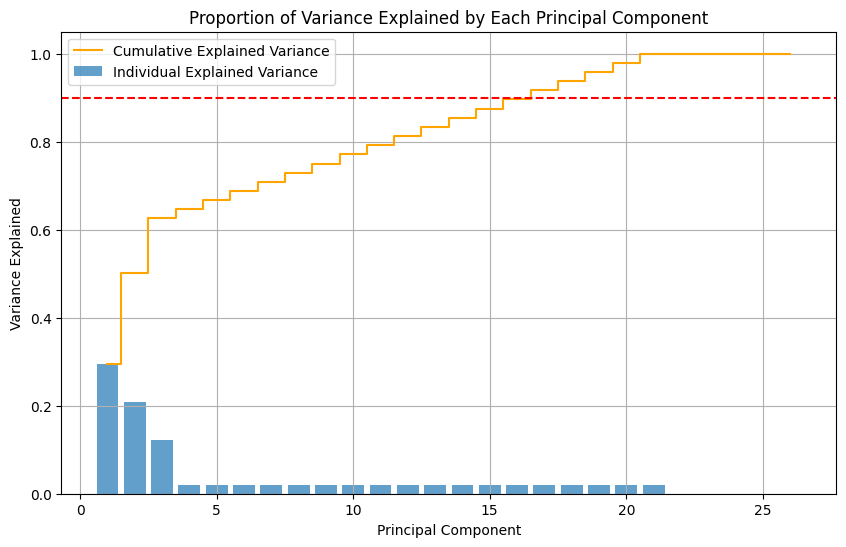

In [10]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
#plt.plot(cumulative_explained_variance, color='orange')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='orange')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Proportion of Variance Explained by Each Principal Component')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [11]:
# PCA Correlation heatmap
principal_components = pca.components_
covariance_matrix = pca.get_covariance()

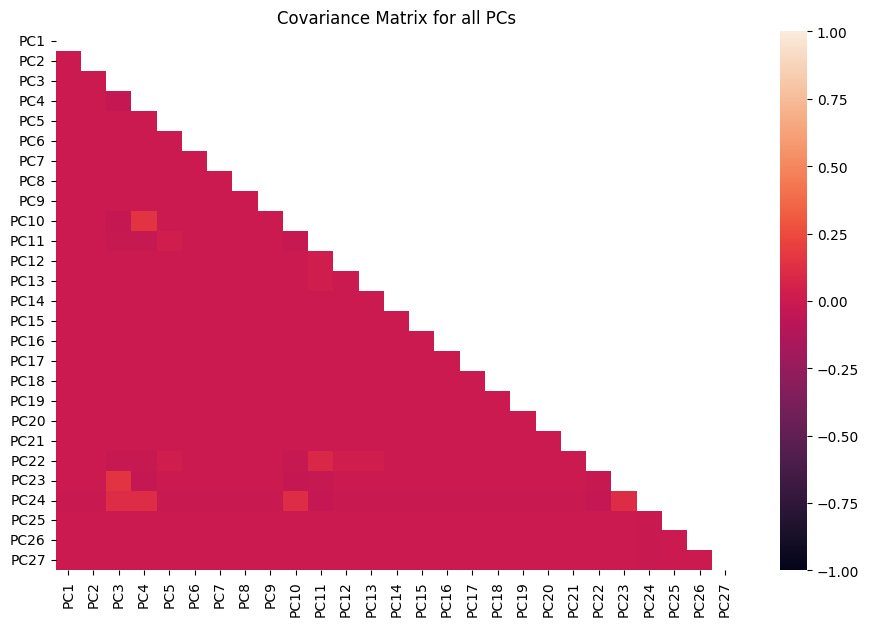

In [12]:
# Compute the covariance matrix of the principal components
#covariance_matrix = np.cov(principal_components, rowvar=False)
covariance_matrix_df = pd.DataFrame(covariance_matrix, 
                                    index=[f'PC{i+1}' for i in range(len(covariance_matrix))], 
                                    columns=[f'PC{i+1}' for i in range(len(covariance_matrix))])

# tweaking the figure size
plt.figure(figsize=(11,7))

# mask to show only bottom of triangle
mask = np.triu(np.ones_like(covariance_matrix_df, dtype=float))

# show Collinearity Heatmap
sns.heatmap(covariance_matrix_df, annot=False, mask=mask, vmin=-1, vmax=1)
plt.title('Covariance Matrix for all PCs')
plt.show()

In [13]:
np.set_printoptions(precision=5,suppress=True)

ei_pca = pca.fit_transform(vec)
pd.DataFrame(np.round(np.cov(ei_pca.T),5))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.48816,-0.00000,-0.0000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,...,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.0,0.0,0.0,0.0,-0.0
1,-0.00000,0.34483,-0.0000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,...,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.0,0.0,0.0,-0.0,0.0
2,-0.00000,-0.00000,0.2038,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,...,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.0,0.0,-0.0,0.0,-0.0
3,0.00000,-0.00000,-0.0000,0.03448,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,-0.0,-0.0,-0.0,-0.0,0.0
4,-0.00000,0.00000,-0.0000,0.00000,0.03448,-0.00000,0.00000,0.00000,-0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,-0.0,0.0,-0.0,-0.0,0.0
5,-0.00000,-0.00000,-0.0000,0.00000,-0.00000,0.03448,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.0,0.0,-0.0,-0.0,0.0
6,-0.00000,-0.00000,-0.0000,-0.00000,0.00000,0.00000,0.03448,0.00000,0.00000,-0.00000,...,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.0,-0.0,-0.0,-0.0,0.0
7,-0.00000,0.00000,0.0000,0.00000,0.00000,-0.00000,0.00000,0.03448,0.00000,0.00000,...,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.0,0.0,0.0,-0.0,0.0
8,-0.00000,0.00000,0.0000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.03448,0.00000,...,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.0,0.0,0.0,0.0,0.0
9,0.00000,-0.00000,-0.0000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.03448,...,0.00000,0.00000,-0.00000,0.00000,0.00000,0.0,-0.0,-0.0,0.0,0.0


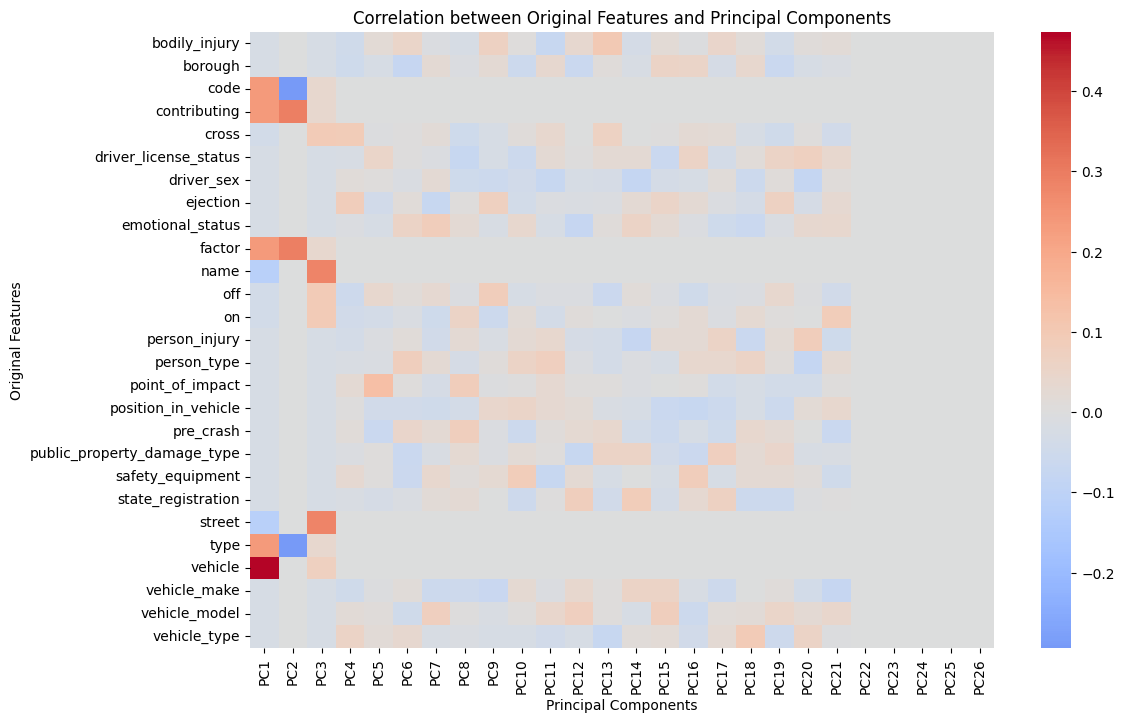

In [14]:
# calc loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the loadings to represent the correlations
loadings_df = pd.DataFrame(
    loadings,
    index=vectorizor.get_feature_names_out(),
    columns=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

### Shows that later PCs grow less correlated to the original set; we should cut off around 16 according to this and the original graph

### SVD Solution to PCA Problem -- The Finished Logistic Regression Model

#### Pseudo Code
##### Step 1: Load and preprocess data
Input: Data matrix X (m x n), Labels Y (m x k)
    - m: number of samples
    - n: number of features
    - k: number of classes (for multivariate logistic regression)

Preprocess data:
    - Normalize/Standardize X if needed
    - Handle missing values if any

##### Step 2: Perform SVD on the data matrix
Input: X
    - Compute SVD: X = U Σ V^T
        - U: left singular vectors (m x m)
        - Σ: diagonal matrix of singular values (m x n)
        - V^T: right singular vectors (n x n)
    - Reduce dimensionality by selecting top-d singular values
        - X_reduced = U_d Σ_d (m x d)
        - d is the reduced dimensionality (chosen based on variance explained or hyperparameter)

Output: Reduced data matrix X_reduced (m x d)

##### Step 3: Train multivariate logistic regression
Input: X_reduced, Y
    - Initialize weights W (d x k) and bias b (1 x k)
    - Define hypothesis: 
        - For each sample i: H_i = softmax(X_reduced[i] * W + b)
    - Define cost function (Cross-Entropy Loss):
        J = -(1/m) * Σ Σ (Y[i,j] * log(H_i[j]))
        where i iterates over samples, j over classes
    - Optimize W and b using gradient descent or advanced optimizers
        - Gradients:
            ∂J/∂W = (1/m) * X_reduced^T * (H - Y)
            ∂J/∂b = (1/m) * Σ (H - Y)
        - Update rules:
            W = W - learning_rate * ∂J/∂W
            b = b - learning_rate * ∂J/∂b

Output: Trained weights W, bias b

##### Step 4: Evaluate the model
Input: Test data X_test, Test labels Y_test
    - Project X_test to reduced space using SVD components: X_test_reduced = U_d^T * X_test
    - Predict using trained model:
        - H_test = softmax(X_test_reduced * W + b)
    - Compute performance metrics (accuracy, precision, recall, etc.)

Output: Performance metrics, Predictions


In [ ]:
## GENERAL SETUP
# Load data
df = pd.read_csv("Motor_Vehicle_Collisions_-_Full.csv")

# Filter to keep only rows where 'PERSON_INJURY' is not null
df = df[df['PERSON_INJURY'].notna()]

# Replace 'Unspecified' and 'Injured' with 0, and 'Killed' with 1 in 'PERSON_INJURY'
df['PERSON_INJURY'] = df['PERSON_INJURY'].replace({'Unspecified': 0, 'Injured': 0, 'Killed': 1})

# Drop irrelevant columns for vectorization and PCA
df = df.drop(['LATITUDE', 'LONGITUDE', 'COLLISION_ID', 'VEHICLE_YEAR', 'CRASH DATE', 'CRASH TIME', 
                'ZIP CODE', 'LOCATION', 'PERSON_ID', 'DRIVER_LICENSE_JURISDICTION', 'PED_LOCATION', 
                'PED_ACTION', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX', 'VEHICLE_DAMAGE', 
                'VEHICLE_DAMAGE_1','VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'TRAVEL_DIRECTION', 
                'PUBLIC_PROPERTY_DAMAGE'], axis=1)

# Generating df for testing where preportion of killed to not killed is closer to 5050

# Filter all rows where 'PERSON_INJURY' is 1
injury_df = df[df['PERSON_INJURY'] == 1]

# Randomly sample 4000 rows where 'PERSON_INJURY' is 0
no_injury_sample_df = df[df['PERSON_INJURY'] == 0].sample(n=4000, random_state=42)

# Concatenate the two DataFrames
df_t = pd.concat([injury_df, no_injury_sample_df])

# Shuffle the rows in case the order matters
df_t = df_t.sample(frac=1, random_state=42).reset_index(drop=True)
t_df = df_t

# Remove rows with empty strings
df_t = df_t.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df_t = df_t[df_t.str.strip() != ""]  # Keep only rows with non-empty strings

# Reset indices to ensure alignment with 'PERSON_INJURY'
df_t = df_t.reset_index(drop=True)
df = df.loc[df_t.index].reset_index(drop=True)

In [18]:
# Vectorize the text data in df_t
vectorizer = CountVectorizer()
vec = vectorizer.fit_transform(df_t)

# Use TruncatedSVD to reduce dimensions instead of PCA to handle sparse data efficiently
svd = TruncatedSVD(n_components=23, random_state=42)  # n_components=23 provides highest accuracy
principal_components = svd.fit_transform(vec)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, t_df['PERSON_INJURY'], test_size=0.20, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8946877912395154
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       796
           1       0.80      0.78      0.79       277

    accuracy                           0.89      1073
   macro avg       0.86      0.86      0.86      1073
weighted avg       0.89      0.89      0.89      1073



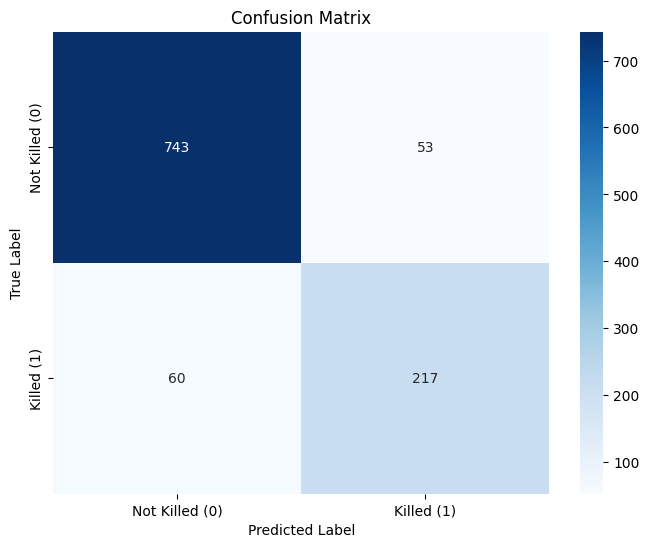

In [19]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Killed (0)", "Killed (1)"], 
            yticklabels=["Not Killed (0)", "Killed (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()